In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./seoul_4.csv')

In [3]:
df.head()

,gu_l,dong_l,s_c,used_y,square,per_cost_man,floor,YN_r,YN_top10,cost
0,0,8,1,32,77.75,1922.829582,7,1,1,149500
1,0,8,1,33,54.98,2619.134231,7,1,1,144000
2,0,8,1,33,79.97,2035.138177,7,1,1,162750
3,0,8,1,33,79.97,2000.750281,8,1,1,160000
4,0,8,1,33,79.97,1875.703389,5,1,1,150000


In [4]:
X = df.drop(['cost'], axis = 1)
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

## GBM

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
gbr = GradientBoostingRegressor(loss = 'ls',
                                learning_rate = 0.001,
                                max_features = 2,
                                max_depth = 4,
                                criterion = 'mse',
                                n_estimators = 9000,
                                random_state = 99)

In [7]:
%time
gbr.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


GradientBoostingRegressor(criterion='mse', learning_rate=0.001, max_depth=4,
                          max_features=2, n_estimators=9000, random_state=99)

In [9]:
# 모델 평가
mean_squared_error(y_test, gbr.predict(X_test))

68405116.07221945

In [10]:
# feature importance
gbr.feature_importances_

array([0.0844798 , 0.01602277, 0.00818802, 0.04973684, 0.36684495,
       0.44946208, 0.01837623, 0.00342219, 0.00346712])

In [11]:
df.columns

Index(['gu_l', 'dong_l', 's_c', 'used_y', 'square', 'per_cost_man', 'floor',
       'YN_r', 'YN_top10', 'cost'],
      dtype='object')

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


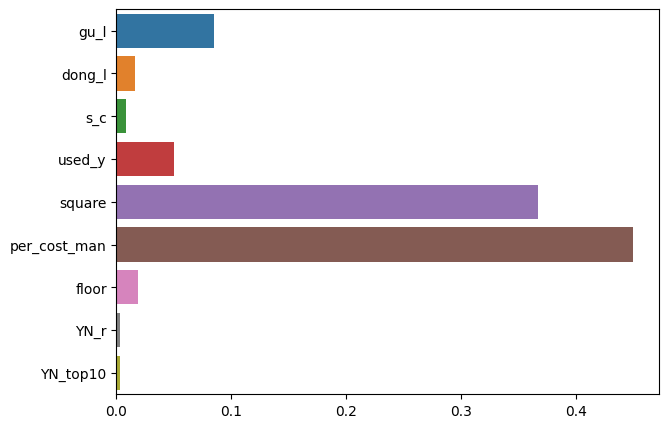

In [12]:
plt.figure(figsize = (7,5))
sns.barplot(gbr.feature_importances_,
            ['gu_l', 'dong_l', 's_c', 'used_y', 'square', 'per_cost_man', 'floor',
       'YN_r', 'YN_top10'])
plt.show()

In [ ]:
# 하이퍼 파라미터 튜닝 ---- 너무 오래걸릴것같아서 확인못함
%time
from sklearn.model_selection import GridSearchCV

params = {
    'loss' : ['ls', 'lad', 'huber', 'quantile'],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'max_features' : [1,2,3,4],
    'max_depth' : [1,2,3,4]
}

grid_cv = GridSearchCV(gbr, param_grid = params, cv=4, scoring='neg_mean_squared_error', verbose=1)
grid_cv.fit(X_train, y_train)

In [ ]:
print(f'최적의 하이퍼 파라미터 : {grid_cv.best_params_}')
print(f'최고 예측 정확도 : {grid_cv.best_score_}')